In [1]:
import numpy as np
from PIL import Image
import os

# List of image file paths
image_paths = [
    "/content/cat_10.jpeg", "/content/cat_11.jpeg", "/content/dog_2.jpeg",
    "/content/dog_3.jpeg", "/content/dog_4.jpeg", "/content/dog_5.jpeg", "/content/dog_6.jpeg",
    "/content/cat_7.jpeg", "/content/cat_8.jpeg", "/content/cat_9.jpeg"
]

# Directory to save .npy files
save_dir = "/content/npy_files"
os.makedirs(save_dir, exist_ok=True)

def process_and_save_image(image_path, save_dir):
    """Loads, preprocesses (grayscale, resize, normalize, flatten), and saves the image."""
    if not os.path.exists(image_path):
        print(f"Warning: File not found - {image_path}")
        return

    try:
        img = Image.open(image_path).convert("L").resize((224, 224))  # Convert to grayscale and resize
        img_array = np.array(img, dtype=np.float32) / 255.0  # Normalize pixel values to [0,1]
        img_flattened = img_array.ravel()  # Flatten to 1D vector

        # Save as .npy file
        filename = os.path.splitext(os.path.basename(image_path))[0] + ".npy"
        save_path = os.path.join(save_dir, filename)
        np.save(save_path, img_flattened)

        print(f"✅ Saved: {save_path}")
    except Exception as e:
        print(f"❌ Error processing {image_path}: {e}")

# Process all images
for image_path in image_paths:
    process_and_save_image(image_path, save_dir)

# List saved files
saved_files = os.listdir(save_dir)
print(f"\nTotal .npy files saved: {len(saved_files)}")
print("Saved .npy files:", saved_files)


✅ Saved: /content/npy_files/cat_10.npy
✅ Saved: /content/npy_files/cat_11.npy
✅ Saved: /content/npy_files/dog_2.npy
✅ Saved: /content/npy_files/dog_3.npy
✅ Saved: /content/npy_files/dog_4.npy
✅ Saved: /content/npy_files/dog_5.npy
✅ Saved: /content/npy_files/dog_6.npy
✅ Saved: /content/npy_files/cat_7.npy
✅ Saved: /content/npy_files/cat_8.npy
✅ Saved: /content/npy_files/cat_9.npy

Total .npy files saved: 10
Saved .npy files: ['cat_8.npy', 'dog_6.npy', 'dog_4.npy', 'cat_11.npy', 'cat_7.npy', 'dog_2.npy', 'cat_10.npy', 'cat_9.npy', 'dog_3.npy', 'dog_5.npy']


In [3]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 100.5 MB/s eta 0:00:00


In [4]:
import numpy as np
import pennylane as qml

# List of .npy files to process
npy_files = [
    "/content/npy_files/cat_10.npy", "/content/npy_files/cat_11.npy", "/content/npy_files/dog_2.npy",
    "/content/npy_files/dog_3.npy", "/content/npy_files/dog_4.npy", "/content/npy_files/dog_5.npy",
    "/content/npy_files/dog_6.npy", "/content/npy_files/cat_7.npy", "/content/npy_files/cat_8.npy",
    "/content/npy_files/cat_9.npy"
]

# Quantum Device: Adjust qubit count based on number of features used
num_qubits = 8  # Modify this based on how many features you're encoding
dev = qml.device("default.qubit", wires=num_qubits)

def basis_encoding(image_features):
    """Encodes binary image features into a quantum state using basis encoding."""

    # Convert continuous values to binary (Threshold at 0.5)
    binary_features = (image_features > 0.5).astype(int)

    @qml.qnode(dev)
    def circuit():
        """Quantum circuit for basis encoding."""
        for i in range(num_qubits):
            if binary_features[i]:  # If the feature is 1, apply an X gate
                qml.PauliX(wires=i)
        return qml.state()

    return circuit()

# Process all images
quantum_states = []
for file in npy_files:
    image_features = np.load(file)[:num_qubits]  # Take first N features
    quantum_state = basis_encoding(image_features)
    quantum_states.append(quantum_state)

    print(f"Encoded {file} into quantum state.")

# Save the quantum states as .npy files
np.save("/content/quantum_encoded_images.npy", quantum_states)
print("Quantum states saved successfully.")


Encoded /content/npy_files/cat_10.npy into quantum state.
Encoded /content/npy_files/cat_11.npy into quantum state.
Encoded /content/npy_files/dog_2.npy into quantum state.
Encoded /content/npy_files/dog_3.npy into quantum state.
Encoded /content/npy_files/dog_4.npy into quantum state.
Encoded /content/npy_files/dog_5.npy into quantum state.
Encoded /content/npy_files/dog_6.npy into quantum state.
Encoded /content/npy_files/cat_7.npy into quantum state.
Encoded /content/npy_files/cat_8.npy into quantum state.
Encoded /content/npy_files/cat_9.npy into quantum state.
Quantum states saved successfully.


In [5]:
import numpy as np
import pennylane as qml

# Load quantum-encoded images
quantum_encoded_images = np.load("/content/quantum_encoded_images.npy")

# Get number of qubits based on the encoded images
num_qubits = int(np.log2(quantum_encoded_images.shape[1]))  # Since state vector has 2^n elements

# PennyLane quantum device
dev = qml.device("default.qubit", wires=num_qubits)

def qft(wires):
    """Applies Quantum Fourier Transform (QFT) on the given qubits."""
    n = len(wires)

    for i in range(n):
        qml.Hadamard(wires=i)
        for j in range(i+1, n):
            qml.ControlledPhaseShift(np.pi / 2**(j - i), wires=[j, i])

    # Reverse qubit order (QFT convention)
    for i in range(n // 2):
        qml.SWAP(wires=[i, n - i - 1])

@qml.qnode(dev)
def apply_qft(state):
    """Quantum circuit to apply QFT on an input quantum state."""
    qml.StatePrep(state, wires=range(num_qubits))  # Load quantum state properly
    qft(wires=range(num_qubits))  # Apply QFT
    return qml.state()

# Apply QFT on each quantum-encoded image
qft_transformed_states = []
for state in quantum_encoded_images:
    transformed_state = apply_qft(state)
    qft_transformed_states.append(transformed_state)

    print("Applied QFT on a quantum-encoded image.")

# Convert to numpy array and save
qft_transformed_states = np.array(qft_transformed_states)
np.save("/content/qft_transformed_images.npy", qft_transformed_states)

print("QFT-transformed states saved successfully.")


Applied QFT on a quantum-encoded image.
Applied QFT on a quantum-encoded image.
Applied QFT on a quantum-encoded image.
Applied QFT on a quantum-encoded image.
Applied QFT on a quantum-encoded image.
Applied QFT on a quantum-encoded image.
Applied QFT on a quantum-encoded image.
Applied QFT on a quantum-encoded image.
Applied QFT on a quantum-encoded image.
Applied QFT on a quantum-encoded image.
QFT-transformed states saved successfully.


In [6]:
qft_states = np.load("/content/qft_transformed_images.npy")
print(qft_states.shape)  # (10, 2^num_qubits)

(10, 256)


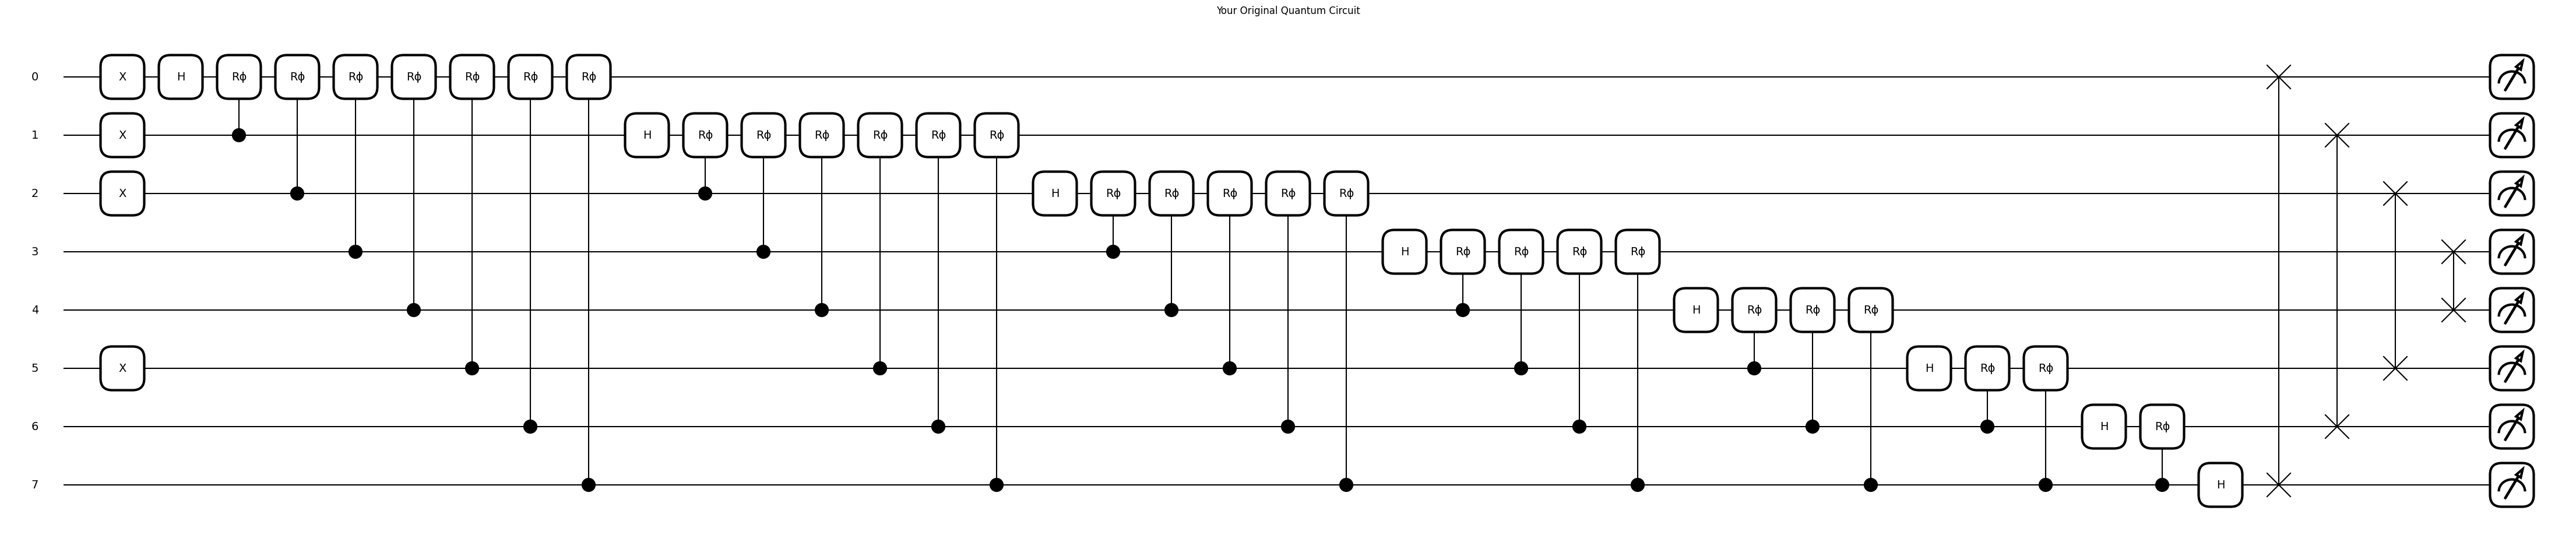

In [7]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Set up the device with 8 qubits (same as your original code)
num_qubits = 8
dev = qml.device("default.qubit", wires=num_qubits)

# Define the quantum circuit (identical to your basis encoding + QFT)
@qml.qnode(dev)
def circuit(image_features):
    # Basis encoding (threshold > 0.5)
    binary_features = (image_features[:num_qubits] > 0.5).astype(int)
    for i in range(num_qubits):
        if binary_features[i]:
            qml.PauliX(wires=i)

    # Apply QFT (same as your implementation)
    for i in range(num_qubits):
        qml.Hadamard(wires=i)
        for j in range(i+1, num_qubits):
            qml.ControlledPhaseShift(np.pi / 2**(j - i), wires=[j, i])
    for i in range(num_qubits // 2):
        qml.SWAP(wires=[i, num_qubits - i - 1])

    return qml.state()

# Load one of your preprocessed images (replace with your actual data)
dummy_image = np.random.rand(224*224)  # Simulate flattened image

# Draw the circuit
fig, ax = qml.draw_mpl(circuit)(dummy_image)
plt.title("Your Original Quantum Circuit")
plt.show()

In [8]:
import numpy as np
import pennylane as qml

# Load quantum-encoded images
quantum_encoded_images = np.load("/content/quantum_encoded_images.npy")

# Number of qubits required
num_qubits = int(np.log2(quantum_encoded_images.shape[1]))  # Since state vector has 2^n elements

# Define PennyLane quantum device
dev = qml.device("default.qubit", wires=num_qubits)

def qft(wires):
    """Applies Quantum Fourier Transform (QFT) on the given qubits."""
    n = len(wires)

    for i in range(n):
        qml.Hadamard(wires=i)
        for j in range(i+1, n):
            qml.ControlledPhaseShift(np.pi / 2**(j - i), wires=[j, i])

    # Reverse qubit order (QFT convention)
    for i in range(n // 2):
        qml.SWAP(wires=[i, n - i - 1])

@qml.qnode(dev)
def apply_qft(state):
    """Quantum circuit to apply QFT on an input quantum state."""
    qml.StatePrep(state, wires=range(num_qubits))  # Load state
    qft(wires=range(num_qubits))  # Apply QFT
    return qml.state()

# Apply QFT on each quantum-encoded image
qft_transformed_states = []
for state in quantum_encoded_images:
    transformed_state = apply_qft(state)
    qft_transformed_states.append(transformed_state)

print("Applied QFT on all quantum-encoded images.")

# Convert to numpy array
qft_transformed_states = np.array(qft_transformed_states)

# Split into 4 parts
split_data = np.array_split(qft_transformed_states, 4)

# Save 4 files
np.save("/content/qft_transformed_part1.npy", split_data[0])
np.save("/content/qft_transformed_part2.npy", split_data[1])
np.save("/content/qft_transformed_part3.npy", split_data[2])
np.save("/content/qft_transformed_part4.npy", split_data[3])

print("QFT-transformed states saved successfully in 4 files.")


Applied QFT on all quantum-encoded images.
QFT-transformed states saved successfully in 4 files.


In [10]:
import numpy as np
import os
from sklearn.model_selection import train_test_split

# List of .npy files to process
npy_files = [
    "/content/npy_files/cat_10.npy", "/content/npy_files/cat_11.npy", "/content/npy_files/dog_2.npy",
    "/content/npy_files/dog_3.npy", "/content/npy_files/dog_4.npy", "/content/npy_files/dog_5.npy",
    "/content/npy_files/dog_6.npy", "/content/npy_files/cat_7.npy", "/content/npy_files/cat_8.npy",
    "/content/npy_files/cat_9.npy"
]

# Labels: 0 for 'cat' and 1 for 'dog'
labels = []
for file in npy_files:
    if 'cat' in os.path.basename(file):
        labels.append(0)  # label 0 for cat
    elif 'dog' in os.path.basename(file):
        labels.append(1)  # label 1 for dog

# Load the .npy files
data = [np.load(file) for file in npy_files]

# Split the data into training (80%) and testing (20%)
# stratify ensures that the split maintains the same label distribution in both sets
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=42, stratify=labels
)

# Convert to numpy arrays for easier handling
train_data = np.array(train_data)
test_data = np.array(test_data)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# Save the training and testing data
np.save("/content/train_data.npy", train_data)
np.save("/content/test_data.npy", test_data)
np.save("/content/train_labels.npy", train_labels)
np.save("/content/test_labels.npy", test_labels)

# Check the split
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)
print("Training labels shape:", train_labels.shape)
print("Testing labels shape:", test_labels.shape)


Training data shape: (8, 50176)
Testing data shape: (2, 50176)
Training labels shape: (8,)
Testing labels shape: (2,)
